In [1]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
import string
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow import keras
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Text Processing-Removing stop words,Tokenization 

In [2]:
#function to remove  stopwords
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ''.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    removed_stop_words = list(filter(lambda x: x != '', removed_stop_words))
    return removed_stop_words


def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = word_tokenize(review)
    review = remove_stop_words(review) #remove stop words
    review = ' '.join(review)
    return review


# Count Vectorizer with ngrams

In [3]:
def CV_ngrams(X_train,X_test):
    count_vectorizer = CountVectorizer (binary=True, ngram_range=(1, 3))
    count_vectorizer.fit(X)
    train_features_cv = count_vectorizer.transform(X_train)
    test_features_cv = count_vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# Count Vectorizer 

In [4]:
def Count_Vectorizer(X_train,X_test):
    count_vectorizer = CountVectorizer()
    count_vectorizer.fit(X)
    train_features_cv = count_vectorizer.transform(X_train)
    test_features_cv = count_vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# TF-IDF

In [5]:
def tfidf(X_train,X_test):    
    vectorizer = TfidfVectorizer ()
    vectorizer.fit(X)
    train_features_cv = vectorizer.transform(X_train)
    test_features_cv = vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# Confusion Matrix

In [6]:
def confusion_matrix(cnf_matrix):    
    class_names=[0,1,2] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 



In [7]:
def plotting(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

# DRUGS.COM 

In [8]:
drugsCom_path = 'drugsCom_raw.csv'
drugsCom_data = pd.read_csv(drugsCom_path)
for i in range(len(drugsCom_data)):
    if((pd.isnull(drugsCom_data.review[i])) == True):
        drugsCom_data = drugsCom_data.drop([i])
    elif((pd.isnull(drugsCom_data.rating[i])) == True):
        drugsCom_data = drugsCom_data.drop([i])  
drugsCom_data['rating_label'] = drugsCom_data.rating.apply(lambda x : 0 if x <= 4 else (1 if x in range(5,7) else 2))
drugsCom_data.drop(["drugID","drugName","condition","date","usefulCount"],axis=1,inplace=True)
# drugsCom_data.drop(["drugID","drugName","condition","date","rating","usefulCount"],axis=1,inplace=True)
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
print("DrugsCom  Data")
print("Shape of drugsCom data: ",drugsCom_data.shape)
drugsCom_data.head()

DrugsCom  Data
Shape of drugsCom data:  (215063, 3)


,review,rating,rating_label
0,"""It has no side effect, I take it in combinati...",9.0,2
1,"""My son is halfway through his fourth week of ...",8.0,2
2,"""I used to take another oral contraceptive, wh...",5.0,1
3,"""This is my first time using any form of birth...",8.0,2
4,"""Suboxone has completely turned my life around...",9.0,2


# Rating

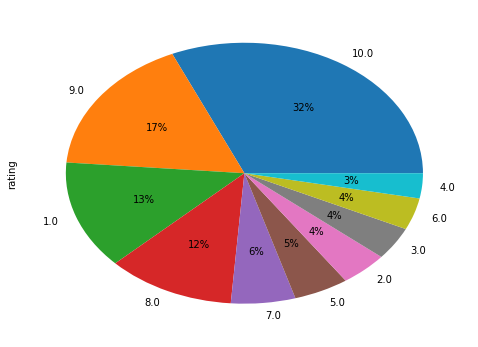

In [15]:
drugsCom_data.rating.value_counts().plot(kind='pie', autopct='%1.0f%%')

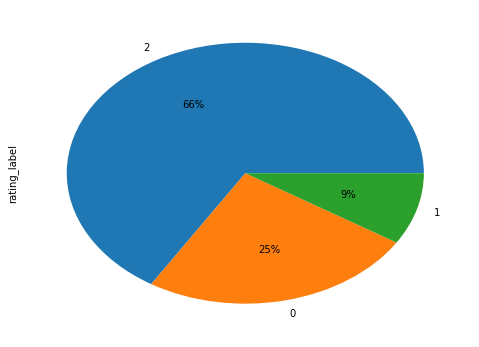

In [16]:
drugsCom_data.rating_label.value_counts().plot(kind='pie', autopct='%1.0f%%')

WordCloud for rating <= 4


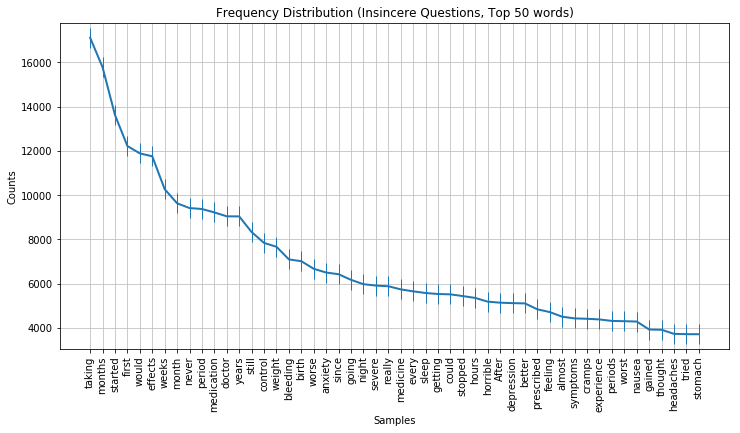

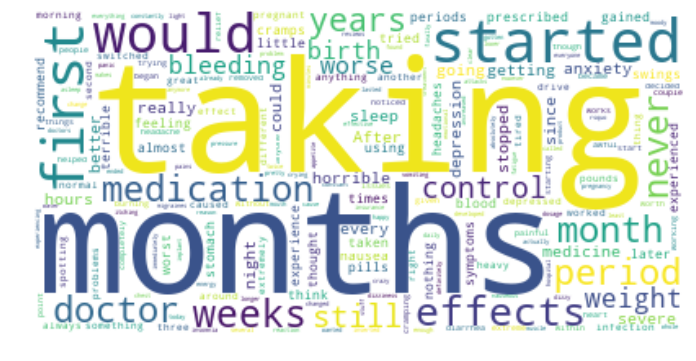

In [10]:
effectiveness = drugsCom_data.loc[drugsCom_data['rating_label'] == 0].values

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[0]) for question in effectiveness]

all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

print("WordCloud for rating <= 4")

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud for rating >= 7


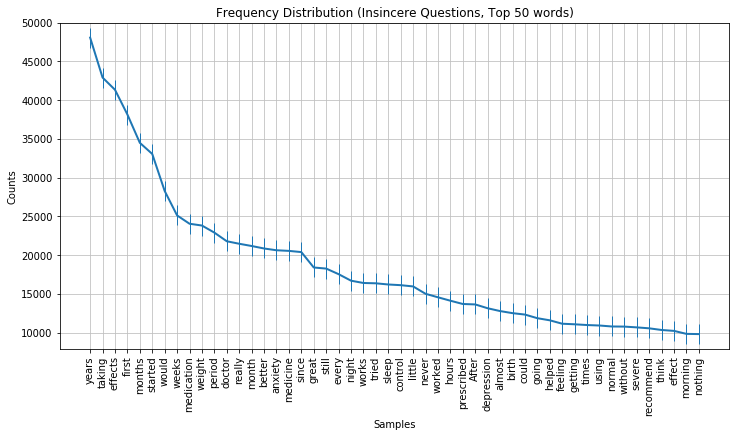

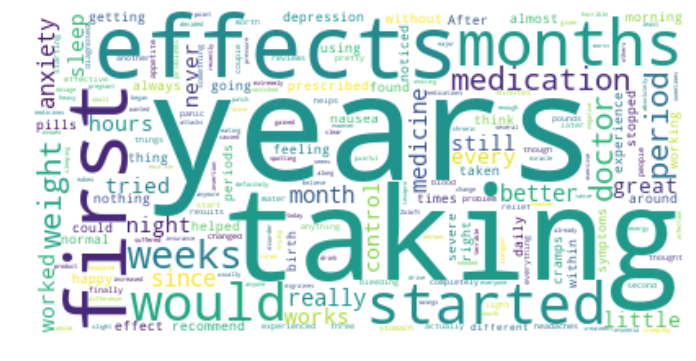

In [11]:
effectiveness = drugsCom_data.loc[drugsCom_data['rating_label'] == 2].values

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[0]) for question in effectiveness]

all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

print("WordCloud for rating >= 7")

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

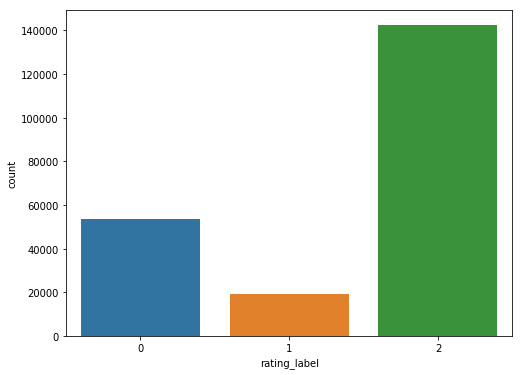

In [9]:
drugsCom_data['review_clean_data'] = drugsCom_data.review.apply(clean_data)
X = drugsCom_data["review_clean_data"].values
y = drugsCom_data["rating_label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
eff_train_X_tfidf ,eff_test_X_tfidf = tfidf(X_train,X_test)
eff_train_X_cv ,eff_test_X_cv = Count_Vectorizer(X_train,X_test)
eff_train_X_cv_ngrams ,eff_test_X_cv_ngrams = CV_ngrams(X_train,X_test)
sns.countplot(drugsCom_data['rating_label'],label="Count")
plt.show()

Count Vectorizer and KNN
Accuracy: 0.6909943086709073
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     13393
           1       0.30      0.10      0.15      4796
           2       0.77      0.84      0.80     35577

   micro avg       0.69      0.69      0.69     53766
   macro avg       0.52      0.48      0.49     53766
weighted avg       0.66      0.69      0.67     53766



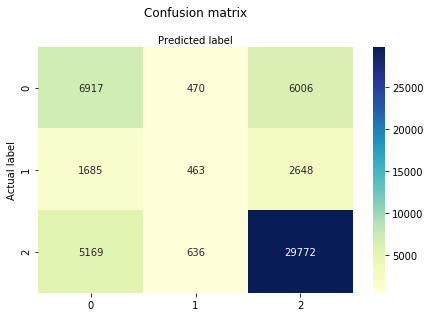

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv,y_train)
y_pred=knn.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFDIF and KNN
Accuracy: 0.6673734330245881
              precision    recall  f1-score   support

           0       0.69      0.03      0.06     13393
           1       0.44      0.01      0.01      4796
           2       0.67      1.00      0.80     35577

   micro avg       0.67      0.67      0.67     53766
   macro avg       0.60      0.34      0.29     53766
weighted avg       0.65      0.67      0.54     53766



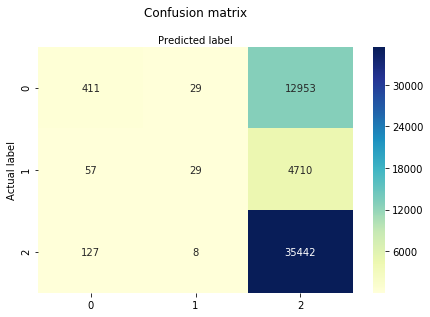

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_tfidf,y_train)
y_pred=knn.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFDIF and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and KNN
Accuracy: 0.6595246066287245
              precision    recall  f1-score   support

           0       0.44      0.42      0.43     13393
           1       0.34      0.06      0.10      4796
           2       0.74      0.83      0.78     35577

   micro avg       0.66      0.66      0.66     53766
   macro avg       0.50      0.44      0.44     53766
weighted avg       0.63      0.66      0.63     53766



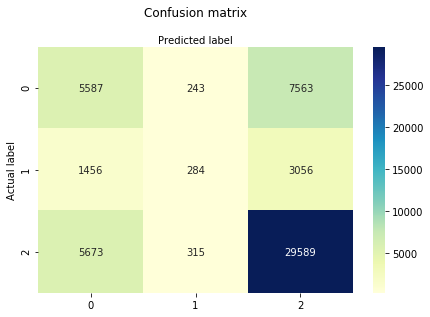

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv_ngrams,y_train)
y_pred=knn.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.8058810400624931
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     13393
           1       0.53      0.16      0.24      4796
           2       0.84      0.93      0.88     35577

   micro avg       0.81      0.81      0.81     53766
   macro avg       0.70      0.60      0.62     53766
weighted avg       0.79      0.81      0.79     53766



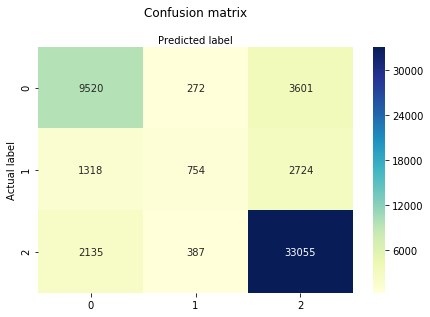

In [13]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv,y_train)
y_pred=logreg.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer  and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tfidf and Logistic Regression
Accuracy: 0.7949261615147118
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     13393
           1       0.44      0.03      0.06      4796
           2       0.82      0.94      0.88     35577

   micro avg       0.79      0.79      0.79     53766
   macro avg       0.66      0.55      0.55     53766
weighted avg       0.76      0.79      0.76     53766



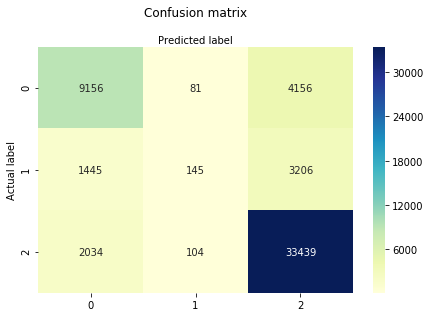

In [14]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_tfidf,y_train)
y_pred=logreg.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("tfidf and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.9180708998251683
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     13393
           1       0.95      0.63      0.75      4796
           2       0.93      0.97      0.95     35577

   micro avg       0.92      0.92      0.92     53766
   macro avg       0.92      0.83      0.86     53766
weighted avg       0.92      0.92      0.92     53766



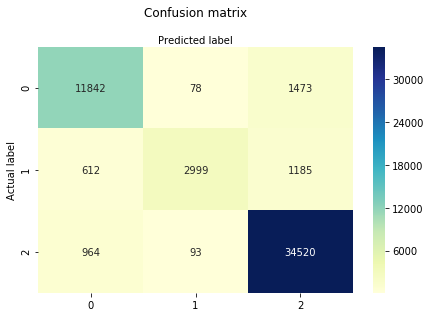

In [15]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv_ngrams,y_train)
y_pred=logreg.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Random Forest
Accuracy: 0.8941896365732991
              precision    recall  f1-score   support

           0       0.91      0.77      0.83     13393
           1       1.00      0.61      0.75      4796
           2       0.88      0.98      0.93     35577

   micro avg       0.89      0.89      0.89     53766
   macro avg       0.93      0.78      0.84     53766
weighted avg       0.90      0.89      0.89     53766



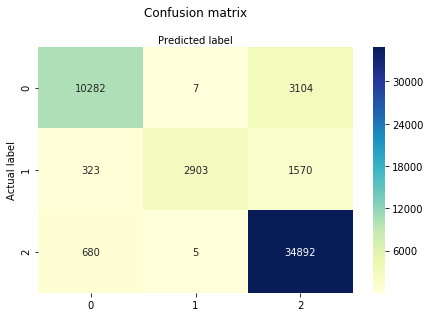

In [16]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv,y_train)
y_pred=forest.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Random Forest
Accuracy: 0.8935944649034706
              precision    recall  f1-score   support

           0       0.93      0.76      0.83     13393
           1       1.00      0.60      0.75      4796
           2       0.88      0.98      0.93     35577

   micro avg       0.89      0.89      0.89     53766
   macro avg       0.93      0.78      0.84     53766
weighted avg       0.90      0.89      0.89     53766



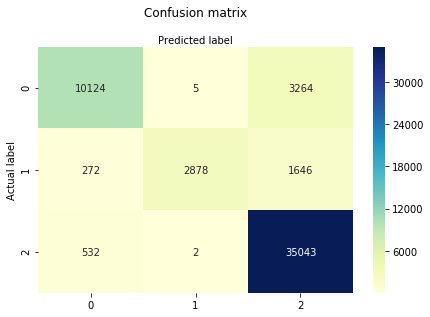

In [17]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_tfidf,y_train)
y_pred=forest.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Random Forest
Accuracy: 0.886266413718707
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     13393
           1       1.00      0.60      0.75      4796
           2       0.86      0.99      0.92     35577

   micro avg       0.89      0.89      0.89     53766
   macro avg       0.94      0.77      0.83     53766
weighted avg       0.90      0.89      0.88     53766



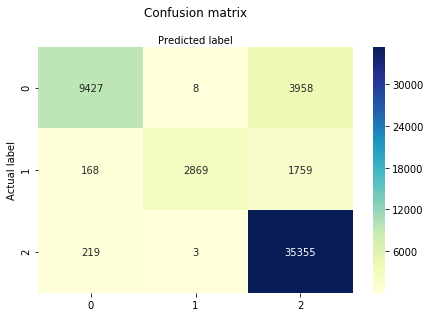

In [18]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv_ngrams,y_train)
y_pred=forest.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Bagging
Accuracy: 0.8769296581482722
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     13393
           1       0.91      0.57      0.70      4796
           2       0.89      0.95      0.92     35577

   micro avg       0.88      0.88      0.88     53766
   macro avg       0.87      0.77      0.81     53766
weighted avg       0.88      0.88      0.87     53766



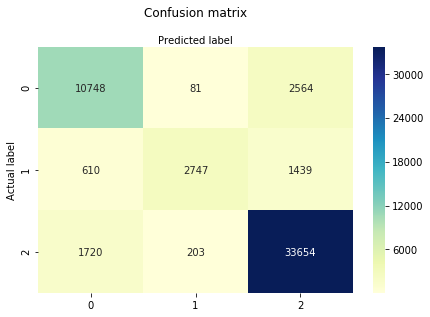

In [12]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv, y_train)
y_pred=bag.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Bagging
Accuracy: 0.879812520924004
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     13393
           1       0.94      0.57      0.71      4796
           2       0.89      0.95      0.92     35577

   micro avg       0.88      0.88      0.88     53766
   macro avg       0.89      0.77      0.81     53766
weighted avg       0.88      0.88      0.88     53766



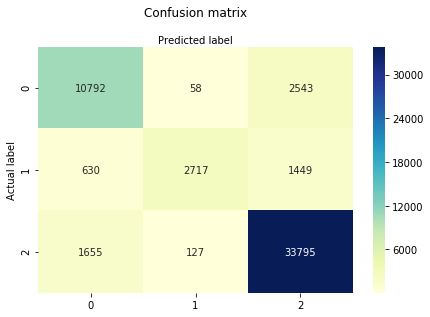

In [13]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_tfidf, y_train)
y_pred=bag.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [10]:
#Word Embeddings
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)
X_train, val_X, y_train, val_y = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)
vocabulary_size = len(tk.word_counts.keys())+1



W1111 23:15:31.961796 11312 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1111 23:15:31.979792 11312 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1111 23:15:31.981742 11312 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1111 23:15:32.226372 11312 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1111 23:15:32.241314 11312 deprecation_wrapper.py:119] From C:\Users\reshm\Anac

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           1576000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               186400    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 1,763,003
Trainable params: 1,763,003
Non-trainable params: 0
_________________________________________________________________
None


W1111 23:15:32.827325 11312 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 145167 samples, validate on 16130 samples
Epoch 1/10
145167/145167 [==============================] - 454s 3ms/step - loss: 0.8371 - acc: 0.6612 - val_loss: 0.8352 - val_acc: 0.6613
Epoch 2/10
145167/145167 [==============================] - 473s 3ms/step - loss: 0.8359 - acc: 0.6613 - val_loss: 0.8352 - val_acc: 0.6614
Epoch 3/10
145167/145167 [==============================] - 450s 3ms/step - loss: 0.8355 - acc: 0.6614 - val_loss: 0.8350 - val_acc: 0.6613
Epoch 4/10
145167/145167 [==============================] - 449s 3ms/step - loss: 0.8348 - acc: 0.6613 - val_loss: 0.8330 - val_acc: 0.6613oss: 0.8348 - acc: 0.66
Epoch 5/10
145167/145167 [==============================] - 455s 3ms/step - loss: 0.7463 - acc: 0.6982 - val_loss: 0.5986 - val_acc: 0.7771
Epoch 6/10
145167/145167 [==============================] - 467s 3ms/step - loss: 0.5465 - acc: 0.7966 - val_loss: 0.5369 - val_acc: 0.8014
Epoch 7/10
145167/145167 [==============================] - 467s 3ms/step - loss: 0.47

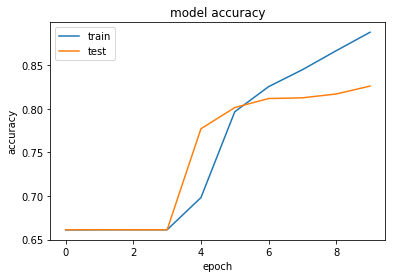

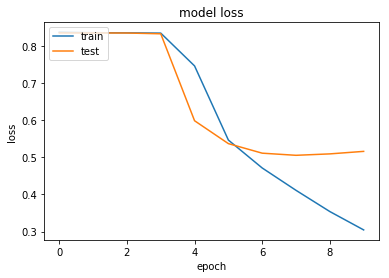

Word Embeddings and LSTM with adam optimiser
Test Accuracy: 82.448015
53766/53766 [==============================] - 10s 178us/step
              precision    recall  f1-score   support

           0       0.87      0.55      0.67     13277
           1       0.82      0.01      0.01      4854
           2       0.93      0.83      0.88     35635

   micro avg       0.92      0.69      0.79     53766
   macro avg       0.87      0.46      0.52     53766
weighted avg       0.91      0.69      0.75     53766
 samples avg       0.69      0.69      0.69     53766



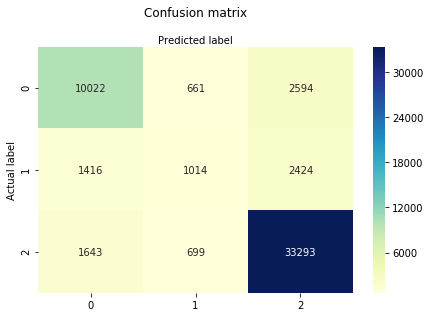

In [12]:
max_words = 100
embedding_size = 32
batch_size = 64
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train,y_train,batch_size = batch_size , epochs = 10,validation_data=(val_X, val_y))
plotting(history)
loss, acc = model.evaluate(X_test,y_test, verbose=0)
print("Word Embeddings and LSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))

y_pred = model.predict([X_test], batch_size=1024, verbose=1)
print(classification_report(y_test, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)

W1204 20:52:32.372255 20852 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1204 20:52:32.422120 20852 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1204 20:52:32.437080 20852 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1204 20:52:32.912841 20852 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1204 20:52:32.920789 20852 deprecation.py:506

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 100)          4925000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 128)          84480     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51  

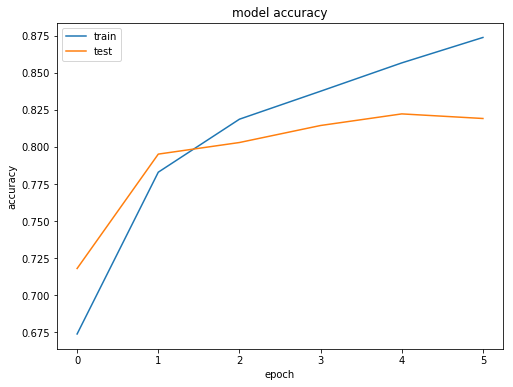

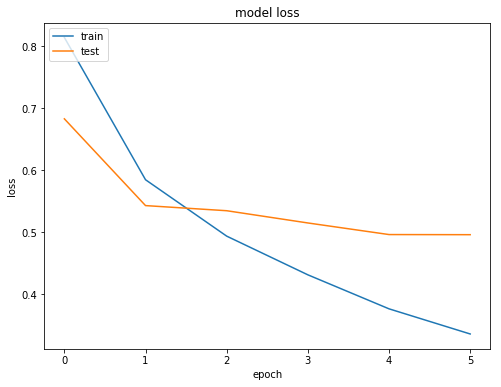

Word Embeddings and BiLSTM with adam optimiser
Test Accuracy: 81.417625
53766/53766 [==============================] - 20s 366us/step
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     13277
           1       0.40      0.26      0.32      4854
           2       0.90      0.88      0.89     35635

   micro avg       0.84      0.79      0.81     53766
   macro avg       0.69      0.63      0.65     53766
weighted avg       0.82      0.79      0.81     53766
 samples avg       0.79      0.79      0.79     53766



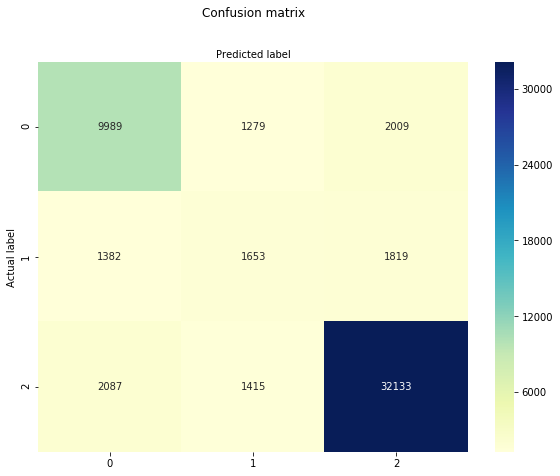

In [11]:
embed_size = 100
inp = Input(shape=(100,))
x = Embedding(vocabulary_size, embed_size)(inp)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(3, activation="sigmoid")(x)
model_biLSTM = Model(inputs=inp, outputs=x)
model_biLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_biLSTM.summary())
history = model_biLSTM.fit(X_train,y_train, batch_size=512, epochs= 6 , validation_data=(val_X, val_y))
plotting(history)

loss, acc = model_biLSTM.evaluate(X_test,y_test, verbose=0)
print("Word Embeddings and BiLSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))

y_pred = model_biLSTM.predict([X_test], batch_size=1024, verbose=1)
print(classification_report(y_test, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)